In [34]:
%tensorflow_version 1.x 
import tensorflow as tf
sess = tf.InteractiveSession()

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
import numpy as np
X =np.expand_dims(np.arange(0.0, 3.0, 0.01),1)
Y =np.sinc(X)
x = tf.placeholder(tf.float64, [300,1], name='x')
y = tf.placeholder(tf.float64, [300,1], name='y')

In [0]:
input_layer = tf.layers.dense(x, 200, activation= tf.nn.relu)
hidden_layer1 = tf.layers.dropout(input_layer,0.2)
hidden_layer2 = tf.layers.dense(hidden_layer1,250,activation=tf.nn.relu)
output_layer = tf.layers.dense(hidden_layer2,1)
Loss =tf.losses.mean_squared_error(y , output_layer)
Optimizer = tf.train.AdamOptimizer(learning_rate= 0.001).minimize(Loss)
init = tf.global_variables_initializer()

In [0]:
loss_list=[]
sess.run(init)
for i in range(0,1000):
  fd ={x:X, y:Y}
  _, loss_val = sess.run([Optimizer, Loss], feed_dict=fd)
  #print ('loss = %s' % loss_val)
  loss_list.append(loss_val)

YP = sess.run(output_layer,feed_dict={x:X})

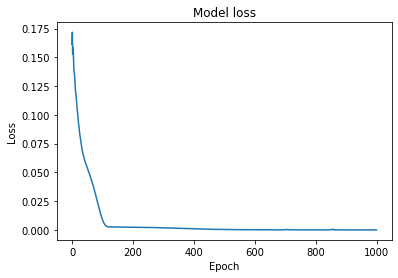

In [38]:
# Plot training  loss values
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

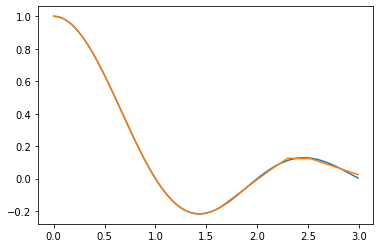

In [39]:
plt.plot(X,Y)
plt.plot(X,YP)
plt.show()